In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.metrics import r2_score
pd.set_option("display.precision", 3)

In [200]:
def rename_columns(df):
    def extract_info(col_name):
        # Regex patterns for different cases
        reverse_pattern = re.search(r'reverse(\d+)', col_name)
        density_pattern = re.search(r'density(\d+)', col_name)
        random_pattern = re.search(r'random(\d+)', col_name)
        baseline_pattern = re.search(r'baseline(\d+)', col_name)

        # Matching the patterns and returning appropriate new names
        if reverse_pattern:
            return f"reverse{reverse_pattern.group(1)}"
        if density_pattern:
            return f"density{density_pattern.group(1)}"
        if random_pattern:
            return f"random{random_pattern.group(1)}"
        if baseline_pattern:
            return "baseline"
        
        return col_name  # Default to original if no match found

    # Create a new dictionary for renaming
    new_column_names = {col: extract_info(col) for col in df.columns}

    # Rename the columns in the DataFrame
    df.rename(columns=new_column_names, inplace=True)

    return df

In [201]:
mem = pd.read_csv("wandb_export_memory_seed1.csv")

In [202]:
wanted_cols = []
for col in (list(mem.columns)):
    if re.search("Memory_step$",col):
        wanted_cols.append(col)
mem = mem[wanted_cols]
new_mem = rename_columns(mem)
mean_mem = new_mem.mean(axis=0)


In [203]:
df = pd.DataFrame(mean_mem).rename(columns={0:"AMU"})

In [204]:
df.head()

,AMU
reverse09,2.071e+09
reverse08,1.592e+09
reverse07,1.207e+09
reverse06,8.997e+08
reverse05,6.516e+08


In [205]:
mem = pd.read_csv("wandb_export_memory_seed2.csv")
wanted_cols = []
for col in (list(mem.columns)):
    if re.search("Memory_step$",col):
        wanted_cols.append(col)
mem = mem[wanted_cols]
new_mem = rename_columns(mem)
mean_mem = new_mem.mean(axis=0)


In [206]:
mean_mem

reverse09    2.070e+09
reverse08    1.579e+09
reverse07    1.201e+09
reverse06    8.962e+08
reverse05    6.510e+08
reverse04    4.564e+08
reverse03    3.018e+08
reverse02    1.904e+08
reverse01    1.147e+08
density09    2.557e+09
density08    2.282e+09
density07    1.970e+09
density06    1.650e+09
density05    1.330e+09
density04    1.014e+09
density03    7.073e+08
density02    4.216e+08
density01    1.946e+08
random09     2.257e+09
random08     1.921e+09
random07     1.554e+09
random06     1.147e+09
random05     9.039e+08
random04     6.829e+08
random02     2.407e+08
random03     4.268e+08
baseline     2.762e+09
random01     1.262e+08
dtype: float64

In [207]:
pd.DataFrame(mean_mem)

,0
reverse09,2.070e+09
reverse08,1.579e+09
reverse07,1.201e+09
reverse06,8.962e+08
reverse05,6.510e+08
reverse04,4.564e+08
reverse03,3.018e+08
reverse02,1.904e+08
reverse01,1.147e+08
density09,2.557e+09


In [208]:
df = df.join(pd.DataFrame(mean_mem)).rename(columns={0:"AMU2"})

In [209]:
df

,AMU,AMU2
reverse09,2.071e+09,2.070e+09
reverse08,1.592e+09,1.579e+09
reverse07,1.207e+09,1.201e+09
reverse06,8.997e+08,8.962e+08
reverse05,6.516e+08,6.510e+08
reverse04,4.572e+08,4.564e+08
reverse03,3.011e+08,3.018e+08
reverse02,1.902e+08,1.904e+08
reverse01,1.154e+08,1.147e+08
density09,2.571e+09,2.557e+09


# Test Loss

In [210]:
test_loss = pd.read_csv("wandb_export_test_loss_seed1.csv")
wanted_cols = []
for col in (list(test_loss.columns)):
    if re.search("test_loss$",col):
        wanted_cols.append(col)
test_loss = test_loss[wanted_cols]
new_test_loss = rename_columns(test_loss)
test_loss = new_test_loss.max()

In [211]:
df = df.merge(pd.DataFrame(test_loss),left_index=True,right_index=True).rename(columns={0:"Test Loss"})

In [212]:
test_loss = pd.read_csv("wandb_export_test_loss_seed2.csv")
wanted_cols = []
for col in (list(test_loss.columns)):
    if re.search("test_loss$",col):
        wanted_cols.append(col)
test_loss = test_loss[wanted_cols]
new_test_loss = rename_columns(test_loss)
test_loss = new_test_loss.max()

In [213]:
test_loss

reverse05    0.312
reverse04    0.450
reverse03    0.564
reverse02    0.699
reverse01    0.862
density09    0.151
density08    0.162
density07    0.155
density06    0.157
density05    0.164
density04    0.224
density03    0.214
density02      NaN
density01    0.258
random09     0.169
random08     0.168
random07     0.180
random06     0.231
random05     0.228
random04     0.281
random02     0.434
random03     0.621
baseline     0.156
random01     0.715
dtype: float64

In [214]:
# pd.options.display.float_format = '{:.3f}'.format


In [215]:
df = df.join(pd.DataFrame(test_loss)).rename(columns={0:"Test Loss(Seed 2)"})

In [216]:
df.AMU = df.AMU/1e9
df.AMU2 = df.AMU2/1e9

In [217]:
df = df.iloc[::-1]

In [218]:
df

,AMU,AMU2,Test Loss,Test Loss(Seed 2)
baseline,2.767,2.762,1.494e-01,0.156
random01,0.126,0.126,1.071e+00,0.715
random02,0.240,0.241,2.177e+02,0.434
random03,0.425,0.427,2.791e-01,0.621
random04,0.678,0.683,3.114e-01,0.281
random05,0.898,0.904,3.810e+18,0.228
random06,1.140,1.147,2.130e-01,0.231
random07,1.544,1.554,1.739e-01,0.180
random08,1.915,1.921,1.685e-01,0.168
random09,2.267,2.257,1.581e-01,0.169


In [219]:
def format_test_loss(value):
    """Format the test loss based on its value."""
    if pd.isna(value):
        return 'NaN'
    elif value >= 1:
        return f"\\underline{{{value:.3f}}}" if value < 50 else f"\\underline{{{value:.3e}}}"
    elif value < 1:
        return f"{value:.3f}"
    else:
        return f"{value:.3e}"

def generate_latex_tables(df):
    # Prepare LaTeX code string
    latex = ""
    
    # Group by prefix in index
    for prefix, group in df.groupby(lambda x: x[:-2]):
        group['Mean AMU'] = group[['AMU', 'AMU2']].mean(axis=1)
        group['Mean Test Loss'] = group[['Test Loss', 'Test Loss(Seed 2)']].mean(axis=1, skipna=True)
        
        # Start the table for this group
        latex += f"\\subsection*{{{prefix.capitalize()}}}\n"
        latex += "\\begin{table}[]\n"
        latex += "\\centering\n"
        latex += "\\begin{tabular}{l|cc:cc|cc}\n"
        latex += f"{prefix.capitalize()} & \\multicolumn{{2}}{{c:}}{{Seed 1}} & \\multicolumn{{2}}{{c|}}{{Seed 2}} & \\multicolumn{{2}}{{c}}{{Mean}} \\\\\n"
        latex += " & AMU [GB] & Test Loss & AMU [GB] & Test Loss & AMU [GB] & Test Loss \\\\\n"
        latex += "\\hline\n"
        
        for idx, row in group.iterrows():
            # Adjust formatting based on whether it's baseline or others
            if 'baseline' in idx:
                display_index = 'Baseline'
            else:
                # Convert '01', '02', ..., '09' to '10\\%', '20\\%', ..., '90\\%'
                display_index = f"{int(idx[-2:]) * 10}\\%"
            
            seed1_test_loss = format_test_loss(row['Test Loss'])
            seed2_test_loss = format_test_loss(row['Test Loss(Seed 2)'])
            mean_test_loss = format_test_loss(row['Mean Test Loss'])
            
            latex += f"{display_index} & {row['AMU']:.3f} & {seed1_test_loss} & {row['AMU2']:.3f} & {seed2_test_loss} & {row['Mean AMU']:.3f} & {mean_test_loss} \\\\\n"
        
        latex += "\\end{tabular}\n"
        latex += "\\end{table}\n\n"
    
    return latex

latex_tables = generate_latex_tables(df)
print(latex_tables)

\subsection*{Baseli}
\begin{table}[]
\centering
\begin{tabular}{l|cc:cc|cc}
Baseli & \multicolumn{2}{c:}{Seed 1} & \multicolumn{2}{c|}{Seed 2} & \multicolumn{2}{c}{Mean} \\
 & AMU [GB] & Test Loss & AMU [GB] & Test Loss & AMU [GB] & Test Loss \\
\hline
Baseline & 2.767 & 0.149 & 2.762 & 0.156 & 2.765 & 0.153 \\
\end{tabular}
\end{table}

\subsection*{Density}
\begin{table}[]
\centering
\begin{tabular}{l|cc:cc|cc}
Density & \multicolumn{2}{c:}{Seed 1} & \multicolumn{2}{c|}{Seed 2} & \multicolumn{2}{c}{Mean} \\
 & AMU [GB] & Test Loss & AMU [GB] & Test Loss & AMU [GB] & Test Loss \\
\hline
10\% & 0.197 & NaN & 0.195 & 0.258 & 0.196 & 0.258 \\
20\% & 0.427 & NaN & 0.422 & NaN & 0.424 & NaN \\
30\% & 0.710 & 0.445 & 0.707 & 0.214 & 0.708 & 0.330 \\
40\% & 1.013 & 0.207 & 1.014 & 0.224 & 1.014 & 0.215 \\
50\% & 1.345 & \underline{3.838e+18} & 1.330 & 0.164 & 1.337 & \underline{1.919e+18} \\
60\% & 1.654 & 0.154 & 1.650 & 0.157 & 1.652 & 0.156 \\
70\% & 1.977 & \underline{2.240e+02} & 1.970 

# Pareto generator single

## Random sampling

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting


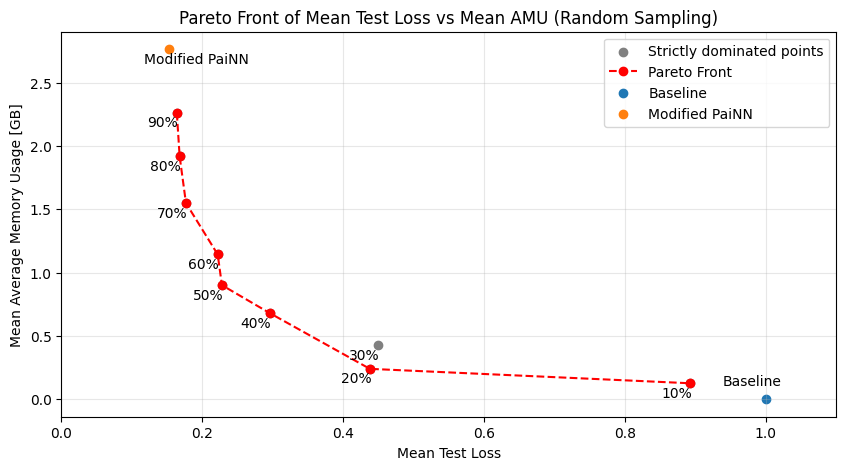

In [221]:
random_data = {
        "Random": ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"],
        "Seed 1 AMU [GB]": [0.126, 0.240, 0.425, 0.678, 0.898, 1.140, 1.544, 1.915, 2.267],
        "Seed 1 Test Loss": [1.071, 0.441, 0.279, 0.311, np.nan, 0.213, 0.174, 0.169, 0.158],
        "Seed 2 AMU [GB]": [0.126, 0.241, 0.427, 0.683, 0.904, 1.147, 1.554, 1.921, 2.257],
        "Seed 2 Test Loss": [0.715, 0.434, 0.621, 0.281, 0.228, 0.231, 0.180, 0.168, 0.169],
        "Mean AMU [GB]": [0.126, 0.240, 0.426, 0.680, 0.901, 1.144, 1.549, 1.918, 2.262],
        "Mean Test Loss": [0.893, 0.438, 0.450, 0.296, 0.228, 0.222, 0.177, 0.168, 0.164]
    }
def plot_random(color="red",offset=(-10, -10),dom_label=""):
# Manually created DataFrame
    
    df = pd.DataFrame(random_data)

    # Removing rows with NaN values in 'Mean Test Loss' to ensure valid computations
    df.dropna(subset=['Mean Test Loss'], inplace=True)

    # Function to compute Pareto front indices
    def compute_pareto_front(points):
        nds = NonDominatedSorting()
        pareto_front_indices = nds.do(points, only_non_dominated_front=True)
        return pareto_front_indices

    # Prepare points for Pareto front computation
    points = np.column_stack((df['Mean Test Loss'], df['Mean AMU [GB]']))
    pareto_indices = compute_pareto_front(points)

    # Plot settings
    plt.scatter(df['Mean Test Loss'], df['Mean AMU [GB]'], color=color if dom_label else "grey", label='Strictly dominated points' if not dom_label else dom_label)
    for i, txt in enumerate(df['Random']):
        plt.annotate(txt, (df['Mean Test Loss'][i], df['Mean AMU [GB]'][i]), textcoords="offset points", xytext=offset, ha='center')

    # Check if Pareto front indices are not empty and plot accordingly
    if pareto_indices.size > 0:
        pareto_points = points[pareto_indices]
        # Sort Pareto points for plotting
        pareto_points = pareto_points[pareto_points[:, 0].argsort()]
        plt.plot(pareto_points[:, 0], pareto_points[:, 1], color='red', label='Pareto Front', marker='o',linestyle="--")
        # Annotate Pareto front points
        # for idx in pareto_indices:
            # plt.annotate(df['Random'][idx], (points[idx, 0], points[idx, 1]), textcoords="offset points", xytext=(-10, -10), ha='center')
    return pareto_indices,pareto_points




    
plt.figure(figsize=(10, 5))

plot_random()
plt.scatter(1,0, label="Baseline")
plt.annotate("Baseline",(1,0), textcoords="offset points", xytext=(-10, 10), ha='center')

plt.scatter(0.153, 2.765,label="Modified PaiNN")
plt.annotate("Modified PaiNN",(0.153, 2.765), textcoords="offset points", xytext=(20, -10), ha='center')
plt.title('Pareto Front of Mean Test Loss vs Mean AMU (Random Sampling)')
plt.xlabel('Mean Test Loss')
plt.ylabel('Mean Average Memory Usage [GB]')
plt.legend()
plt.grid(True,alpha=0.3)
plt.xlim(0,1.1)
plt.show()


## Density

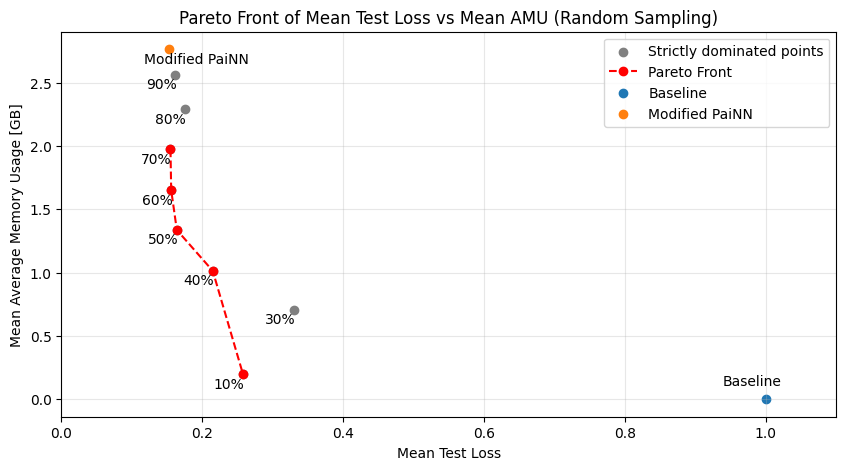

In [222]:

density_data = {
        "Density": ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"],
        "Seed 1 AMU [GB]": [0.197, 0.427, 0.710, 1.013, 1.345, 1.654, 1.977, 2.296, 2.571],
        "Seed 1 Test Loss": [np.nan, np.nan, 0.445, 0.207, np.nan, 0.154, 0.154, 0.187, 0.173],
        "Seed 2 AMU [GB]": [0.195, 0.422, 0.707, 1.014, 1.330, 1.650, 1.970, 2.282, 2.557],
        "Seed 2 Test Loss": [0.258, np.nan, 0.214, 0.224, 0.164, 0.157, 0.155, 0.162, 0.151],
        "Mean AMU [GB]": [0.196, 0.424, 0.708, 1.014, 1.337, 1.652, 1.973, 2.289, 2.564],
        "Mean Test Loss": [0.258, np.nan, 0.330, 0.215, 0.164, 0.156, 0.155, 0.175, 0.162]
    }
def plot_density(color = "red",offset=(-10, -10),dom_label=""):
# Creating the DataFrame from the LaTeX table data
    
    df = pd.DataFrame(density_data)

    # Removing rows with NaN values in 'Mean Test Loss' to ensure valid computations
    df.dropna(subset=['Mean Test Loss'], inplace=True)

    # Function to compute Pareto front indices
    def compute_pareto_front(points):
        nds = NonDominatedSorting()
        pareto_front_indices = nds.do(points, only_non_dominated_front=True)
        return pareto_front_indices

    # Prepare points for Pareto front computation
    points = np.column_stack((df['Mean Test Loss'], df['Mean AMU [GB]']))
    pareto_indices = compute_pareto_front(points)

    # Plot settings
    plt.scatter(df['Mean Test Loss'], df['Mean AMU [GB]'], color=color if dom_label else "grey", label='Strictly dominated points' if not dom_label else dom_label)
    for i in df['Density'].index:
        txt = df["Density"][i]
        plt.annotate(txt, (df['Mean Test Loss'][i], df['Mean AMU [GB]'][i]), textcoords="offset points", xytext=offset, ha='center')

    # Check if Pareto front indices are not empty and plot accordingly
    if pareto_indices.size > 0:
        pareto_points = points[pareto_indices]
        # Sort Pareto points for plotting
        pareto_points = pareto_points[pareto_points[:, 0].argsort()]
        plt.plot(pareto_points[:, 0], pareto_points[:, 1], color=color, label='Pareto Front', marker='o',linestyle="--")
        # Annotate Pareto front points
        # for idx in pareto_indices:
            # plt.annotate(df['Random'][idx], (points[idx, 0], points[idx, 1]), textcoords="offset points", xytext=(-10, -10), ha='center')
    return pareto_indices,pareto_points



plt.figure(figsize=(10, 5))

plot_density()
plt.scatter(1,0, label="Baseline")
plt.annotate("Baseline",(1,0), textcoords="offset points", xytext=(-10, 10), ha='center')

plt.scatter(0.153, 2.765,label="Modified PaiNN")
plt.annotate("Modified PaiNN",(0.153, 2.765), textcoords="offset points", xytext=(20, -10), ha='center')

plt.title('Pareto Front of Mean Test Loss vs Mean AMU (Random Sampling)')
plt.xlabel('Mean Test Loss')
plt.ylabel('Mean Average Memory Usage [GB]')
plt.legend()
plt.grid(True,alpha=0.3)
plt.xlim(0,1.1)
plt.show()

In [223]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset


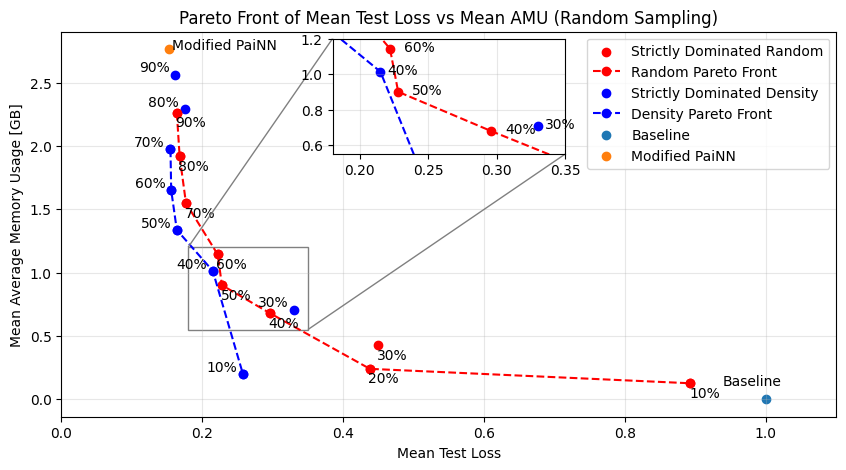

In [250]:
# %matplotlib widget
# plt.figure(figsize=(10, 5))
random_data = pd.DataFrame(random_data)
density_data = pd.DataFrame(density_data)

fig, ax = plt.subplots(figsize=(10, 5))


par,pareto_points_random = plot_random("red",(random_offset:=(10,-10)),"ye")
par,pareto_points_density = plot_density("blue",(density_offset:=(-15,2)),"ye")

plt.scatter(1,0, label="Baseline")
plt.annotate("Baseline",(1,0), textcoords="offset points", xytext=(-10, 10), ha='center')

plt.scatter(0.153, 2.765,label="Modified PaiNN")
plt.annotate("Modified PaiNN",(0.153, 2.765), textcoords="offset points", xytext=(40,0 ), ha='center')

plt.title('Pareto Front of Mean Test Loss vs Mean AMU (Random Sampling)')
plt.xlabel('Mean Test Loss')
plt.ylabel('Mean Average Memory Usage [GB]')
plt.legend(["Strictly Dominated Random","Random Pareto Front","Strictly Dominated Density","Density Pareto Front","Baseline","Modified PaiNN",6,7,8,9])
plt.grid(True,alpha=0.3)
plt.xlim(0,1.1)




axins = inset_axes(ax, width="30%", height="30%", loc='upper center')

axins.scatter(random_data["Mean Test Loss"], random_data["Mean AMU [GB]"], color='red', marker="o")
axins.plot(pareto_points_random[:,0], pareto_points_random[:,1], linestyle="--", color='red')
axins.scatter(density_data["Mean Test Loss"], density_data["Mean AMU [GB]"], color='blue', marker="o")
axins.plot(pareto_points_density[:,0],pareto_points_density[:,1], linestyle="--", color='blue')


axins.set_xlim((lower_bound:=0.18), 0.35)
axins.set_ylim(0.55, (upper_bound:=1.2))
# Copy annotations to inset
for i, row in random_data.iterrows():
    if row["Mean Test Loss"] > lower_bound and row["Mean AMU [GB]"] < upper_bound:
        axins.annotate(row['Random'], (row['Mean Test Loss'], row['Mean AMU [GB]']), textcoords="offset points", xytext=(10,-2))

for i, row in density_data.iterrows():
    if row["Mean Test Loss"] > lower_bound and row["Mean AMU [GB]"] < upper_bound:
        axins.annotate(row['Density'], (row['Mean Test Loss'], row['Mean AMU [GB]']), textcoords="offset points", xytext=(5,-2))


# axins.scatter(x_density, y_density, color='blue')
# Zoom into a specific region

axins.grid(True,alpha=0.3)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

In [225]:
density_data["Mean Test Loss"]

0    0.258
1      NaN
2    0.330
3    0.215
4    0.164
5    0.156
6    0.155
7    0.175
8    0.162
Name: Mean Test Loss, dtype: float64

In [226]:
density_data["Mean AMU [GB]"]

0    0.196
1    0.424
2    0.708
3    1.014
4    1.337
5    1.652
6    1.973
7    2.289
8    2.564
Name: Mean AMU [GB], dtype: float64

In [227]:
par_points[:,0]

array([0.155, 0.156, 0.164, 0.215, 0.258])